<h1 style="background-color: #FAF9F6; font-family: newtimroman; font-size: 250%; color: darkblue; border: 12px solid #A9A9A9; border-radius: 20px; padding: 15px; text-align: center;">
    <b>CO2 Emissions Project</b>
</h1>


<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h2 style="font-weight: bold; color: darkblue;">Import Libraries and Read the Data</h2

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

from IPython.display import display, HTML

plt.rcParams["figure.figsize"] = (10, 6) 
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv("co2.csv")
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h2 style="font-weight: bold; color: darkblue;">EDA</h2

In [3]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [4]:
df.rename({"Make": "make",
           "Model": "model",
           "Vehicle Class": "class",
           "Cylinders": "cylinders",
           "Transmission": "transmission",
           "Fuel Type": "fuel_type",
           "Fuel Consumption City (L/100 km)": "fuel_cons_city_l",
           "Fuel Consumption Hwy (L/100 km)": "fuel_cons_hwy_l",
           "Fuel Consumption Comb (L/100 km)": "fuel_cons_comb_l",
           "Fuel Consumption Comb (mpg)": "fuel_cons_comb_mpg",
           "Engine Size(L)": "engine_size",
           "CO2 Emissions(g/km)": "co2"}, axis=1, inplace=True)

In [5]:
df.columns

Index(['make', 'model', 'class', 'engine_size', 'cylinders', 'transmission',
       'fuel_type', 'fuel_cons_city_l', 'fuel_cons_hwy_l', 'fuel_cons_comb_l',
       'fuel_cons_comb_mpg', 'co2'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make                7385 non-null   object 
 1   model               7385 non-null   object 
 2   class               7385 non-null   object 
 3   engine_size         7385 non-null   float64
 4   cylinders           7385 non-null   int64  
 5   transmission        7385 non-null   object 
 6   fuel_type           7385 non-null   object 
 7   fuel_cons_city_l    7385 non-null   float64
 8   fuel_cons_hwy_l     7385 non-null   float64
 9   fuel_cons_comb_l    7385 non-null   float64
 10  fuel_cons_comb_mpg  7385 non-null   int64  
 11  co2                 7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.5+ KB


In [7]:
df.shape

(7385, 12)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_cons_city_l,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_cons_hwy_l,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_cons_comb_l,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
fuel_cons_comb_mpg,7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [9]:
df.isnull().sum()

make                  0
model                 0
class                 0
engine_size           0
cylinders             0
transmission          0
fuel_type             0
fuel_cons_city_l      0
fuel_cons_hwy_l       0
fuel_cons_comb_l      0
fuel_cons_comb_mpg    0
co2                   0
dtype: int64

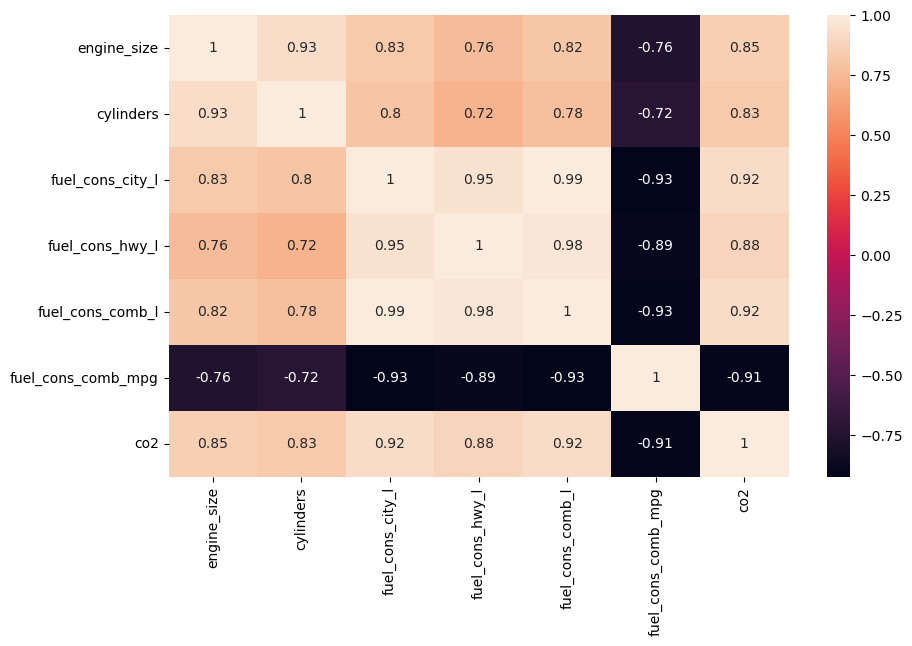

In [10]:
sns.heatmap(data=df.corr(numeric_only = True), annot=True);

In [11]:
def color_red_val(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'white'
    return f' color:{color}'

pd.DataFrame(df).corr(numeric_only = True).style.applymap(color_red_val)

,engine_size,cylinders,fuel_cons_city_l,fuel_cons_hwy_l,fuel_cons_comb_l,fuel_cons_comb_mpg,co2
engine_size,1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
fuel_cons_city_l,0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
fuel_cons_hwy_l,0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
fuel_cons_comb_l,0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
fuel_cons_comb_mpg,-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
co2,0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


<h1 style="background-color: #FAF9F6; font-family: newtimroman; font-size: 200%; color: darkblue; border:7px solid #A9A9A9; border-radius: 20px; padding: 15px; text-align: center;">
    <b>Simple Linear Regression</b>
</h1>


In [12]:
df1 = df[["engine_size", "co2"]]
df1

,engine_size,co2
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
7380,2.0,219
7381,2.0,232
7382,2.0,240
7383,2.0,232


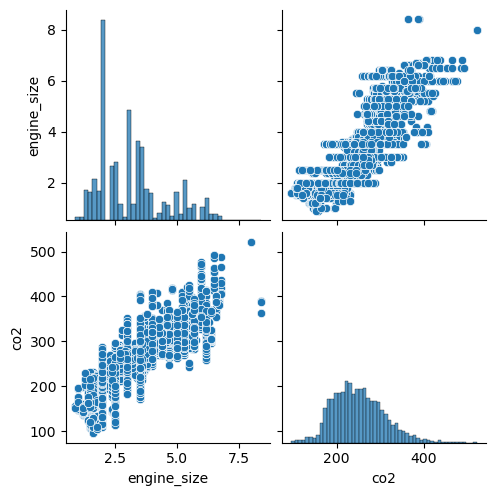

In [13]:
sns.pairplot(df1);

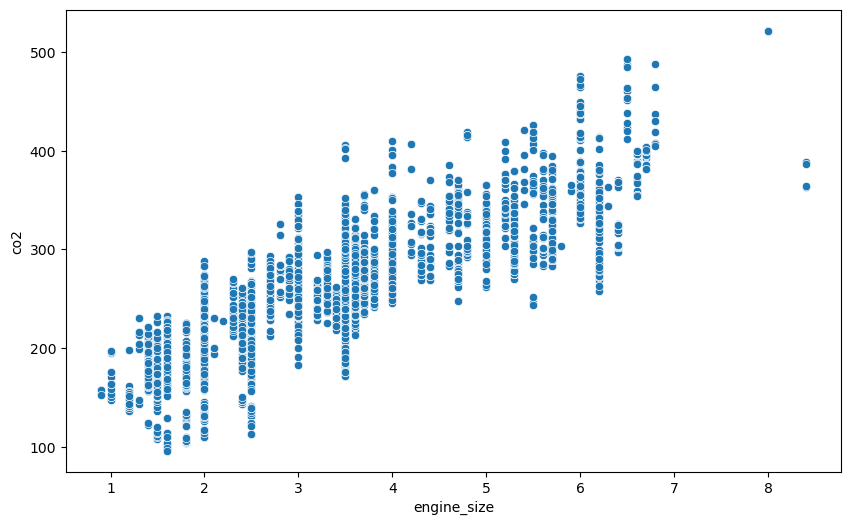

In [14]:
sns.scatterplot(x = "engine_size", y = "co2", data = df1);

In [15]:
corr = df1.co2.corr(df.engine_size)

R2_score = corr ** 2
R2_score

0.7244472046524075

<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h2 style="font-weight: bold; color: darkblue;">Splittin the Data</h2

In [16]:
X = df1["engine_size"]
y = df1["co2"]

In [17]:
# b1 = slope - b0 = intercept

b1, b0 = np.polyfit(X, y, deg=1)

In [18]:
print("b1  :", b1)
print("b0  :", b0)

b1  : 36.77731518641939
b0  : 134.3658927234949


In [19]:
y_pred = b1*X + b0
y_pred

0       207.920523
1       222.631449
2       189.531866
3       263.086496
4       263.086496
           ...    
7380    207.920523
7381    207.920523
7382    207.920523
7383    207.920523
7384    207.920523
Name: engine_size, Length: 7385, dtype: float64

In [20]:
values = {"actual": y, "predicted": y_pred, "residual": y - y_pred, "LSE": (y - y_pred)**2}
df_2 = pd.DataFrame(values)
df_2

,actual,predicted,residual,LSE
0,196,207.920523,-11.920523,142.098871
1,221,222.631449,-1.631449,2.661626
2,136,189.531866,-53.531866,2865.660624
3,255,263.086496,-8.086496,65.391416
4,244,263.086496,-19.086496,364.294325
...,...,...,...,...
7380,219,207.920523,11.079477,122.754808
7381,232,207.920523,24.079477,579.821208
7382,240,207.920523,32.079477,1029.092838
7383,232,207.920523,24.079477,579.821208


In [21]:
df_2.LSE.sum()

6966208.685372684

<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h2 style="font-weight: bold; color: darkblue;">Prediction with Simple Linear Regression</h2

In [22]:
potential_engine = np.linspace(0,9.5,100)
potential_engine

array([0.        , 0.0959596 , 0.19191919, 0.28787879, 0.38383838,
       0.47979798, 0.57575758, 0.67171717, 0.76767677, 0.86363636,
       0.95959596, 1.05555556, 1.15151515, 1.24747475, 1.34343434,
       1.43939394, 1.53535354, 1.63131313, 1.72727273, 1.82323232,
       1.91919192, 2.01515152, 2.11111111, 2.20707071, 2.3030303 ,
       2.3989899 , 2.49494949, 2.59090909, 2.68686869, 2.78282828,
       2.87878788, 2.97474747, 3.07070707, 3.16666667, 3.26262626,
       3.35858586, 3.45454545, 3.55050505, 3.64646465, 3.74242424,
       3.83838384, 3.93434343, 4.03030303, 4.12626263, 4.22222222,
       4.31818182, 4.41414141, 4.51010101, 4.60606061, 4.7020202 ,
       4.7979798 , 4.89393939, 4.98989899, 5.08585859, 5.18181818,
       5.27777778, 5.37373737, 5.46969697, 5.56565657, 5.66161616,
       5.75757576, 5.85353535, 5.94949495, 6.04545455, 6.14141414,
       6.23737374, 6.33333333, 6.42929293, 6.52525253, 6.62121212,
       6.71717172, 6.81313131, 6.90909091, 7.00505051, 7.10101

In [23]:
y_pred_slr = b1 * potential_engine + b0
y_pred_slr

array([134.36589272, 137.89502903, 141.42416534, 144.95330164,
       148.48243795, 152.01157425, 155.54071056, 159.06984686,
       162.59898317, 166.12811948, 169.65725578, 173.18639209,
       176.71552839, 180.2446647 , 183.773801  , 187.30293731,
       190.83207362, 194.36120992, 197.89034623, 201.41948253,
       204.94861884, 208.47775514, 212.00689145, 215.53602776,
       219.06516406, 222.59430037, 226.12343667, 229.65257298,
       233.18170928, 236.71084559, 240.2399819 , 243.7691182 ,
       247.29825451, 250.82739081, 254.35652712, 257.88566343,
       261.41479973, 264.94393604, 268.47307234, 272.00220865,
       275.53134495, 279.06048126, 282.58961757, 286.11875387,
       289.64789018, 293.17702648, 296.70616279, 300.23529909,
       303.7644354 , 307.29357171, 310.82270801, 314.35184432,
       317.88098062, 321.41011693, 324.93925323, 328.46838954,
       331.99752585, 335.52666215, 339.05579846, 342.58493476,
       346.11407107, 349.64320738, 353.17234368, 356.70

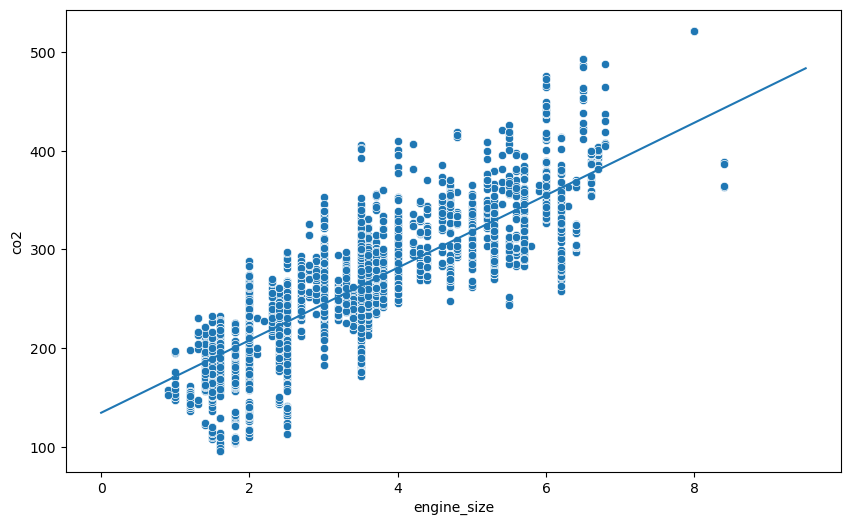

In [24]:
plt.plot(potential_engine, y_pred_slr)
sns.scatterplot(x="engine_size", y="co2", data=df1);

<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h2 style="font-weight: bold; color: darkblue;">Higher Complexity</h2

In [25]:
coefficients = np.polyfit(X, y, deg=4)
a1 = coefficients[0]
a2 = coefficients[1]
a3 = coefficients[2]
a4 = coefficients[3]
a0 = coefficients[4]

In [26]:
y_pred_poly = a1*potential_engine**4 + a2*potential_engine**3 + a3*potential_engine**2 + a4*potential_engine + a0
y_pred_poly

array([ 95.33320742, 101.35682675, 107.31822504, 113.21563235,
       119.0473886 , 124.81194362, 130.50785707, 136.1337985 ,
       141.68854734, 147.17099289, 152.58013431, 157.91508063,
       163.17505078, 168.35937353, 173.46748754, 178.49894135,
       183.45339335, 188.33061181, 193.13047489, 197.85297059,
       202.49819682, 207.06636133, 211.55778176, 215.97288562,
       220.31221028, 224.576403  , 228.76622091, 232.882531  ,
       236.92631013, 240.89864506, 244.8007324 , 248.63387862,
       252.3995001 , 256.09912306, 259.7343836 , 263.30702771,
       266.81891122, 270.27199986, 273.66836922, 277.01020478,
       280.29980185, 283.53956566, 286.73201129, 289.87976368,
       292.98555767, 296.05223796, 299.08275912, 302.08018559,
       305.04769168, 307.9885616 , 310.90618938, 313.80407898,
       316.6858442 , 319.5552087 , 322.41600605, 325.27217967,
       328.12778284, 330.98697875, 333.85404042, 336.73335077,
       339.62940258, 342.54679851, 345.49025109, 348.46

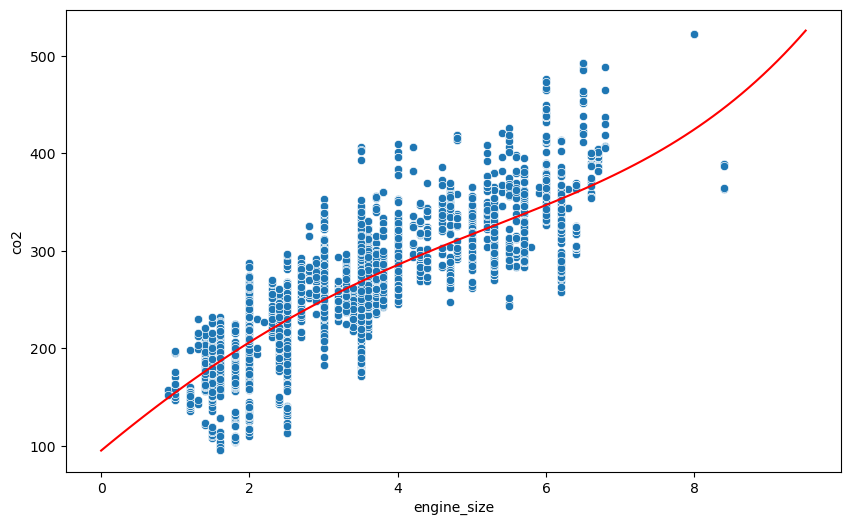

In [27]:
plt.plot(potential_engine, y_pred_poly, color="red")
sns.scatterplot(x="engine_size", y="co2", data=df1);

<h1 style="background-color: #FAF9F6; font-family: newtimroman; font-size: 200%; color: darkblue; border: 7px solid #A9A9A9; border-radius: 20px; padding: 15px; text-align: center;">
    <b>Multi Linear Regression</b>
</h1>


<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h2 style="font-weight: bold; color: darkblue;">Import Libraries</h2

In [28]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.linear_model import Ridge, RidgeCV

from sklearn.linear_model import Lasso, LassoCV

from sklearn.linear_model import ElasticNet, ElasticNetCV

from sklearn.model_selection import GridSearchCV

In [29]:
df.shape

(7385, 12)

In [30]:
df.columns

Index(['make', 'model', 'class', 'engine_size', 'cylinders', 'transmission',
       'fuel_type', 'fuel_cons_city_l', 'fuel_cons_hwy_l', 'fuel_cons_comb_l',
       'fuel_cons_comb_mpg', 'co2'],
      dtype='object')

<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h2 style="font-weight: bold; color: darkblue;">Train|Test Split</h2

In [31]:
X = df[["engine_size", "fuel_cons_comb_l", "fuel_cons_hwy_l", "fuel_cons_city_l"]]
y = df["co2"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [33]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (5908, 4)
y Train features shape: (5908,)
X Test features shape : (1477, 4)
Y Test features shape : (1477,)


<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h2 style="font-weight: bold; color: darkblue;">Scale</h2

In [34]:
scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.12149345, -0.37681659, -0.42937884, -0.33509065],
       [ 0.6141664 ,  0.59257065,  0.56440556,  0.6072775 ],
       [-0.12149345,  0.24636092, -0.02283068,  0.350268  ],
       ...,
       [ 0.24633648, -0.20371173, -0.11317471, -0.24942082],
       [-0.48932338, -0.82688924, -0.74558297, -0.87766626],
       [ 0.6141664 ,  0.31560287,  0.47406152,  0.23604156]])

In [36]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.12149345, -0.03060686, -0.02283068, -0.04952455],
       [ 0.90843035,  1.2849901 ,  1.1516418 ,  1.34974937],
       [ 2.23261809,  1.04264329,  1.06129776,  1.00707004],
       ...,
       [-1.29854922, -1.10385702, -1.10695912, -1.07756253],
       [ 0.24633648, -0.27295367, -0.38420683, -0.1923076 ],
       [-0.85715331, -0.96537313, -1.10695912, -0.84910965]])

<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h1 style="font-weight: bold; color: darkblue;">Linear Regression</h1

In [37]:
lm = LinearRegression()

In [38]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [39]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
              
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.874248,0.871361
mae,13.448848,13.519154
mse,429.888383,442.470616
rmse,20.733750,21.034986


In [41]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring=['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 5)

In [42]:
cv_df = pd.DataFrame(scores, index=range(1, 6)).add_prefix("cv_")
cv_df.iloc[:, 2:].mean()

cv_test_r2                               0.873332
cv_test_neg_mean_absolute_error        -13.465465
cv_test_neg_mean_squared_error        -431.752263
cv_test_neg_root_mean_squared_error    -20.766407
dtype: float64

In [43]:
# Linear Models Coef

lm_df = pd.DataFrame(lm.coef_, columns = ["linear_coef"])
lm_df

,linear_coef
0,17.351017
1,29.687430
2,1.148602
3,8.768462


<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h1 style="font-weight: bold; color: darkblue;">Ridge Regression</h1

In [44]:
alpha_space = np.linspace(1, 1.1, 500)

ridge_cv_model = RidgeCV(alphas=alpha_space, cv=7, scoring="neg_root_mean_squared_error")

In [45]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.        , 1.0002004 , 1.0004008 , 1.0006012 , 1.0008016 ,
       1.001002  , 1.0012024 , 1.00140281, 1.00160321, 1.00180361,
       1.00200401, 1.00220441, 1.00240481, 1.00260521, 1.00280561,
       1.00300601, 1.00320641, 1.00340681, 1.00360721, 1.00380762,
       1.00400802, 1.00420842, 1.00440882, 1.00460922, 1.00480962,
       1.00501002, 1.00521042, 1.00541082, 1.00561122, 1.00581162,
       1.00601202, 1....
       1.09418838, 1.09438878, 1.09458918, 1.09478958, 1.09498998,
       1.09519038, 1.09539078, 1.09559118, 1.09579158, 1.09599198,
       1.09619238, 1.09639279, 1.09659319, 1.09679359, 1.09699399,
       1.09719439, 1.09739479, 1.09759519, 1.09779559, 1.09799599,
       1.09819639, 1.09839679, 1.09859719, 1.0987976 , 1.098998  ,
       1.0991984 , 1.0993988 , 1.0995992 , 1.0997996 , 1.1       ]),
        cv=7, scoring='neg_root_mean_squared_error')

In [46]:
ridge_cv_model.alpha_

1.01563126252505

In [47]:
ridge_cv_model.best_score_

-20.746200763155212

In [48]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [49]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.874244,0.871368
mae,13.450273,13.517243
mse,429.903380,442.446322
rmse,20.734112,21.034408


In [50]:
pd.concat([ls, rcs], axis=1)

,linear_train,linear_test,ridge_cv_train,ridge_cv_test
R2,0.874248,0.871361,0.874244,0.871368
mae,13.448848,13.519154,13.450273,13.517243
mse,429.888383,442.470616,429.903380,442.446322
rmse,20.733750,21.034986,20.734112,21.034408


In [51]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_coef"])

In [52]:
pd.concat([lm_df, rcm_df], axis=1)

,linear_coef,ridge_coef
0,17.351017,17.352773
1,29.687430,21.420793
2,1.148602,4.021021
3,8.768462,14.257443


<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h1 style="font-weight: bold; color: darkblue;">Lasso Regression</h1

In [53]:
lasso_cv_model = LassoCV(alphas=alpha_space, cv=7, max_iter=10000, random_state=42)

In [54]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.        , 1.0002004 , 1.0004008 , 1.0006012 , 1.0008016 ,
       1.001002  , 1.0012024 , 1.00140281, 1.00160321, 1.00180361,
       1.00200401, 1.00220441, 1.00240481, 1.00260521, 1.00280561,
       1.00300601, 1.00320641, 1.00340681, 1.00360721, 1.00380762,
       1.00400802, 1.00420842, 1.00440882, 1.00460922, 1.00480962,
       1.00501002, 1.00521042, 1.00541082, 1.00561122, 1.00581162,
       1.00601202, 1....
       1.09418838, 1.09438878, 1.09458918, 1.09478958, 1.09498998,
       1.09519038, 1.09539078, 1.09559118, 1.09579158, 1.09599198,
       1.09619238, 1.09639279, 1.09659319, 1.09679359, 1.09699399,
       1.09719439, 1.09739479, 1.09759519, 1.09779559, 1.09799599,
       1.09819639, 1.09839679, 1.09859719, 1.0987976 , 1.098998  ,
       1.0991984 , 1.0993988 , 1.0995992 , 1.0997996 , 1.1       ]),
        cv=7, max_iter=10000, random_state=42)

In [55]:
print(lasso_cv_model.n_iter_)

254


In [56]:
best_alpha = lasso_cv_model.alpha_
best_alpha

1.0

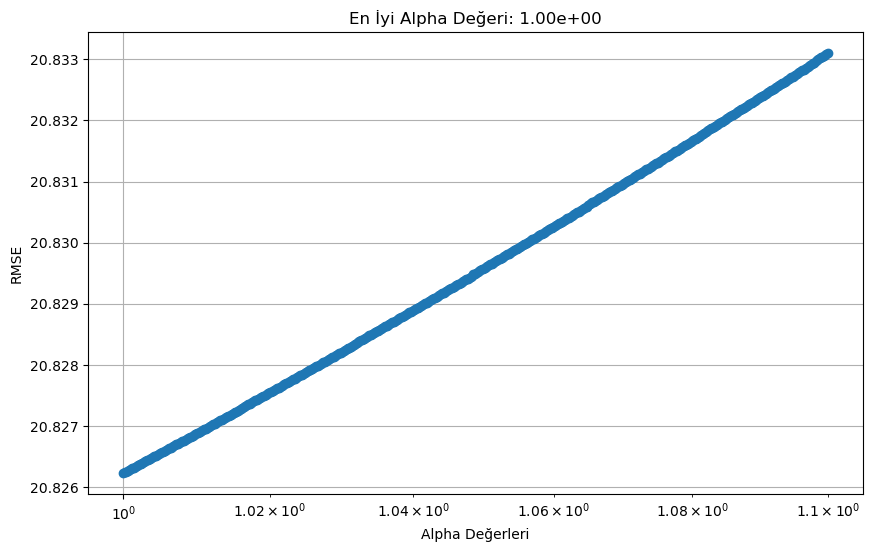

In [57]:
rmse_values = []
for alpha in alpha_space:
    lasso_model = Lasso(alpha=alpha, max_iter=100000, random_state=42)
    lasso_model.fit(X, y)
    y_pred = lasso_model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    rmse_values.append(rmse)

# Alpha değerlerini ve RMSE değerlerini görselleştirin
plt.figure(figsize=(10, 6))
plt.plot(alpha_space, rmse_values, marker='o')
plt.xscale('log')  # X eksenini logaritmik ölçekte ayarlayın
plt.xlabel('Alpha Değerleri')
plt.ylabel('RMSE')
plt.title(f'En İyi Alpha Değeri: {best_alpha:.2e}')
plt.grid()
plt.show()

In [58]:
y_pred = lasso_cv_model.predict(X_test_scaled)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [59]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.873927,0.870899
mae,13.669270,13.760390
mse,430.988291,444.060398
rmse,20.760257,21.072741


In [60]:
pd.concat([ls, rcs, lcs], axis=1)

,linear_train,linear_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test
R2,0.874248,0.871361,0.874244,0.871368,0.873927,0.870899
mae,13.448848,13.519154,13.450273,13.517243,13.669270,13.760390
mse,429.888383,442.470616,429.903380,442.446322,430.988291,444.060398
rmse,20.733750,21.034986,20.734112,21.034408,20.760257,21.072741


In [61]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns=["lasso_coef"])

In [62]:
pd.concat([lm_df, rcm_df, lcm_df], axis=1)

,linear_coef,ridge_coef,lasso_coef
0,17.351017,17.352773,16.779462
1,29.687430,21.420793,32.248994
2,1.148602,4.021021,0.000000
3,8.768462,14.257443,6.786944


<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h1 style="font-weight: bold; color: darkblue;">ElasticNet</h1

In [63]:
elastic_cv_model = ElasticNetCV(alphas=alpha_space,
                                l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1],
                                cv=7,
                                max_iter=10000,
                                random_state=42)

In [64]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([1.        , 1.0002004 , 1.0004008 , 1.0006012 , 1.0008016 ,
       1.001002  , 1.0012024 , 1.00140281, 1.00160321, 1.00180361,
       1.00200401, 1.00220441, 1.00240481, 1.00260521, 1.00280561,
       1.00300601, 1.00320641, 1.00340681, 1.00360721, 1.00380762,
       1.00400802, 1.00420842, 1.00440882, 1.00460922, 1.00480962,
       1.00501002, 1.00521042, 1.00541082, 1.00561122, 1.00581162,
       1.006012...
       1.09418838, 1.09438878, 1.09458918, 1.09478958, 1.09498998,
       1.09519038, 1.09539078, 1.09559118, 1.09579158, 1.09599198,
       1.09619238, 1.09639279, 1.09659319, 1.09679359, 1.09699399,
       1.09719439, 1.09739479, 1.09759519, 1.09779559, 1.09799599,
       1.09819639, 1.09839679, 1.09859719, 1.0987976 , 1.098998  ,
       1.0991984 , 1.0993988 , 1.0995992 , 1.0997996 , 1.1       ]),
             cv=7, l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1], max_iter=10000,
             random_state=42)

In [65]:
print(elastic_cv_model.n_iter_)

254


In [66]:
elastic_cv_model.alpha_

1.0

In [67]:
elastic_cv_model.l1_ratio_

1.0

In [68]:
elastic_cv_model.coef_

array([16.77946235, 32.24899414,  0.        ,  6.78694372])

In [69]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [70]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.873927,0.870899
mae,13.669270,13.760390
mse,430.988291,444.060398
rmse,20.760257,21.072741


In [71]:
pd.concat([ls, rcs, lcs, ecs], axis = 1)

,linear_train,linear_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elastic_cv_train,elastic_cv_test
R2,0.874248,0.871361,0.874244,0.871368,0.873927,0.870899,0.873927,0.870899
mae,13.448848,13.519154,13.450273,13.517243,13.669270,13.760390,13.669270,13.760390
mse,429.888383,442.470616,429.903380,442.446322,430.988291,444.060398,430.988291,444.060398
rmse,20.733750,21.034986,20.734112,21.034408,20.760257,21.072741,20.760257,21.072741


In [72]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef"])

In [73]:
pd.concat([lm_df, rcm_df, lcm_df, ecm_df], axis=1)

,linear_coef,ridge_coef,lasso_coef,elastic_coef
0,17.351017,17.352773,16.779462,16.779462
1,29.687430,21.420793,32.248994,32.248994
2,1.148602,4.021021,0.000000,0.000000
3,8.768462,14.257443,6.786944,6.786944


<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h1 style="font-weight: bold; color: darkblue;">GridSearch</h1

In [74]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

param_grid = {"alpha": alpha_space,
              "l1_ratio":[0.1, 0.3, 0.5, 0.7, 0.9, 0.99, 1]}

In [75]:
grid_model = GridSearchCV(estimator = elastic_model,
                          param_grid = param_grid,
                          scoring = "neg_root_mean_squared_error",
                          cv = 10,
                          verbose = 2)

In [76]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 3500 candidates, totalling 35000 fits
[CV] END ............................alpha=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha

[CV] END ............alpha=1.0002004008016032, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0002004008016032, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0002004008016032, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0002004008016032, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0002004008016032, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0002004008016032, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0002004008016032, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0002004008016032, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0002004008016032, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0002004008016032, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0002004008016032, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0002004008016032, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0006012024048097, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0006012024048097, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0006012024048097, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0006012024048097, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0006012024048097, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0006012024048097, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0006012024048097, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0006012024048097, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0006012024048097, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0006012024048097, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0006012024048097, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0006012024048097, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END ..............alpha=1.001002004008016, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.001002004008016, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.001002004008016, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.001002004008016, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.001002004008016, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.001002004008016, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.001002004008016, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.001002004008016, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.001002004008016, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.001002004008016, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.001002004008016, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.001002004008016, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha

[CV] END ............alpha=1.0014028056112225, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0014028056112225, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0014028056112225, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0014028056112225, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0014028056112225, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0014028056112225, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0014028056112225, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0014028056112225, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0014028056112225, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0014028056112225, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0014028056112225, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0014028056112225, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0020040080160322, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0020040080160322, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0020040080160322, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0020040080160322, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0020040080160322, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0020040080160322, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0020040080160322, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0020040080160322, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0020040080160322, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0020040080160322, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0020040080160322, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0020040080160322, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0024048096192384, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0024048096192384, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0024048096192384, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0024048096192384, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0024048096192384, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0024048096192384, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0024048096192384, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0024048096192384, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0024048096192384, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0024048096192384, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0024048096192384, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0024048096192384, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1

[CV] END ............alpha=1.0028056112224448, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0028056112224448, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0028056112224448, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0028056112224448, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0028056112224448, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0028056112224448, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0028056112224448, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0028056112224448, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0028056112224448, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0028056112224448, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0028056112224448, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0028056112224448, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0034068136272545, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0034068136272545, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0034068136272545, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0034068136272545, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0034068136272545, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0034068136272545, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0034068136272545, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0034068136272545, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0034068136272545, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0034068136272545, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0034068136272545, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0034068136272545, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END ..............alpha=1.003807615230461, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.003807615230461, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.003807615230461, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.003807615230461, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.003807615230461, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.003807615230461, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.003807615230461, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.003807615230461, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.003807615230461, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.003807615230461, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.003807615230461, l1_ratio=0.99; total time=   0.0s
[CV] END ................alpha=1.003807615230461, l1_ratio=1; total time=   0.0s
[CV] END ................alp

[CV] END ...............alpha=1.0042084168336673, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0042084168336673, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0042084168336673, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0042084168336673, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0044088176352706, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0044088176352706, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0044088176352706, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0044088176352706, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0044088176352706, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0044088176352706, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0044088176352706, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0044088176352706, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ..............alpha=1.004809619238477, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.004809619238477, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.004809619238477, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.004809619238477, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.004809619238477, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.004809619238477, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.004809619238477, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.004809619238477, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.004809619238477, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.004809619238477, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.004809619238477, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.004809619238477, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=

[CV] END ...............alpha=1.0052104208416834, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0052104208416834, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0052104208416834, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0052104208416834, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0052104208416834, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0052104208416834, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0052104208416834, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0052104208416834, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0052104208416834, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0052104208416834, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0054108216432867, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0054108216432867, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ..............alpha=1.005811623246493, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.005811623246493, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.005811623246493, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.005811623246493, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.005811623246493, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.005811623246493, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.005811623246493, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.005811623246493, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.005811623246493, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.005811623246493, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.005811623246493, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.005811623246493, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha

[CV] END ............alpha=1.0062124248496993, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0062124248496993, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0062124248496993, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0062124248496993, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0062124248496993, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0062124248496993, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0062124248496993, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0062124248496993, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0062124248496993, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0062124248496993, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0062124248496993, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0062124248496993, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=1.006813627254509, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.006813627254509, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.006813627254509, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.006813627254509, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.006813627254509, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.006813627254509, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.006813627254509, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.006813627254509, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.006813627254509, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.006813627254509, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.006813627254509, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.006813627254509, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha

[CV] END .............alpha=1.0072144288577154, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0072144288577154, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0072144288577154, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0072144288577154, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0072144288577154, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0072144288577154, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0072144288577154, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0072144288577154, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0072144288577154, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0072144288577154, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0072144288577154, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0072144288577154, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1

[CV] END ...............alpha=1.0076152304609218, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0076152304609218, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0076152304609218, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0076152304609218, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0076152304609218, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0076152304609218, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0076152304609218, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0076152304609218, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0076152304609218, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0076152304609218, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=1.007815631262525, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.007815631262525, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha

[CV] END .............alpha=1.0082164328657315, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0082164328657315, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0082164328657315, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0082164328657315, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0082164328657315, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0082164328657315, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0082164328657315, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0082164328657315, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0082164328657315, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0082164328657315, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0082164328657315, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0082164328657315, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.008617234468938, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.008617234468938, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.008617234468938, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.008617234468938, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.008617234468938, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.008617234468938, l1_ratio=0.99; total time=   0.0s
[CV] END ................alpha=1.008617234468938, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.008617234468938, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.008617234468938, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.008617234468938, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.008617234468938, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.008617234468938, l1_ratio=1; total time=   0.0s
[CV] END ................alp

[CV] END ...............alpha=1.0090180360721444, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0090180360721444, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0090180360721444, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0092184368737476, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0092184368737476, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0092184368737476, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0092184368737476, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0092184368737476, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0092184368737476, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0092184368737476, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0092184368737476, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0092184368737476, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ..............alpha=1.009619238476954, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.009619238476954, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.009619238476954, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.009619238476954, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.009619238476954, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.009619238476954, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.009619238476954, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.009619238476954, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.009619238476954, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.009619238476954, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.009619238476954, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.009619238476954, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha

[CV] END ............alpha=1.0100200400801604, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0100200400801604, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0100200400801604, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0100200400801604, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0100200400801604, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0100200400801604, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0100200400801604, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0100200400801604, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0100200400801604, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0100200400801604, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0100200400801604, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0100200400801604, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0106212424849699, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0106212424849699, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0106212424849699, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0106212424849699, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0106212424849699, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0106212424849699, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0106212424849699, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0106212424849699, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0106212424849699, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0106212424849699, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0106212424849699, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0106212424849699, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0110220440881763, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0110220440881763, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0110220440881763, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0110220440881763, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0110220440881763, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0110220440881763, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0110220440881763, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0110220440881763, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0110220440881763, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0110220440881763, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0110220440881763, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0110220440881763, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1

[CV] END ...............alpha=1.0114228456913827, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0114228456913827, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0114228456913827, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0114228456913827, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0114228456913827, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0114228456913827, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0114228456913827, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0114228456913827, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0114228456913827, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=1.011623246492986, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.011623246492986, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.011623246492986, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha

[CV] END .............alpha=1.0120240480961924, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0120240480961924, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0120240480961924, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0120240480961924, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0120240480961924, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0120240480961924, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0120240480961924, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0120240480961924, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0120240480961924, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0120240480961924, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0120240480961924, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0120240480961924, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0124248496993988, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0124248496993988, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0124248496993988, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0124248496993988, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0124248496993988, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0124248496993988, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0124248496993988, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0124248496993988, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0124248496993988, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0124248496993988, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0124248496993988, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0124248496993988, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=1.0128256513026053, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0128256513026053, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0128256513026053, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0128256513026053, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0128256513026053, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0128256513026053, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0128256513026053, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0128256513026053, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0130260521042085, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0130260521042085, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0130260521042085, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0130260521042085, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ..............alpha=1.013426853707415, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.013426853707415, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.013426853707415, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.013426853707415, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.013426853707415, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.013426853707415, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.013426853707415, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.013426853707415, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.013426853707415, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.013426853707415, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.013426853707415, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.013426853707415, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha

[CV] END ............alpha=1.0138276553106214, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0138276553106214, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0138276553106214, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0138276553106214, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0138276553106214, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0138276553106214, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0138276553106214, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0138276553106214, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0138276553106214, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0138276553106214, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0138276553106214, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0138276553106214, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0144288577154308, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0144288577154308, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0144288577154308, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0144288577154308, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0144288577154308, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0144288577154308, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0144288577154308, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0144288577154308, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0144288577154308, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0144288577154308, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0144288577154308, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0144288577154308, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0148296593186372, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0148296593186372, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0148296593186372, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0148296593186372, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0148296593186372, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0148296593186372, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0148296593186372, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0148296593186372, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0148296593186372, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0148296593186372, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0148296593186372, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0148296593186372, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1

[CV] END ...............alpha=1.0152304609218437, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0152304609218437, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0152304609218437, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0152304609218437, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0152304609218437, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0152304609218437, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0152304609218437, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0152304609218437, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0152304609218437, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0154308617234469, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0154308617234469, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0154308617234469, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0158316633266533, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0158316633266533, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0158316633266533, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0158316633266533, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0158316633266533, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0158316633266533, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0158316633266533, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0158316633266533, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0158316633266533, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0158316633266533, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0158316633266533, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0158316633266533, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0162324649298597, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0162324649298597, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0162324649298597, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0162324649298597, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0162324649298597, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0162324649298597, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0162324649298597, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0162324649298597, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0162324649298597, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0162324649298597, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0162324649298597, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0162324649298597, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0168336673346694, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0168336673346694, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0168336673346694, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0168336673346694, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0168336673346694, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0168336673346694, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0168336673346694, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0168336673346694, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0168336673346694, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0168336673346694, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0168336673346694, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0168336673346694, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0172344689378758, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0172344689378758, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0172344689378758, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0172344689378758, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0172344689378758, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0172344689378758, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0172344689378758, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0172344689378758, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0172344689378758, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0172344689378758, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0172344689378758, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0172344689378758, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=1.0176352705410823, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0176352705410823, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0176352705410823, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0176352705410823, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0178356713426855, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0178356713426855, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0178356713426855, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0178356713426855, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0178356713426855, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0178356713426855, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0178356713426855, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0178356713426855, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0182364729458917, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0182364729458917, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0182364729458917, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0182364729458917, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0182364729458917, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0182364729458917, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0182364729458917, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0182364729458917, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0182364729458917, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0182364729458917, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0182364729458917, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0182364729458917, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0186372745490981, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0186372745490981, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0186372745490981, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0186372745490981, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0186372745490981, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0186372745490981, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0186372745490981, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0186372745490981, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0186372745490981, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0186372745490981, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0186372745490981, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0186372745490981, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0192384769539078, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0192384769539078, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0192384769539078, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0192384769539078, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0192384769539078, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0192384769539078, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0192384769539078, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0192384769539078, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0192384769539078, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0192384769539078, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0192384769539078, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0192384769539078, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0196392785571142, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0196392785571142, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0196392785571142, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0196392785571142, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0196392785571142, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0196392785571142, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0196392785571142, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0196392785571142, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0196392785571142, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0196392785571142, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0196392785571142, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0196392785571142, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1

[CV] END ............alpha=1.0200400801603207, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0200400801603207, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0200400801603207, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0200400801603207, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0200400801603207, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0200400801603207, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0200400801603207, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0200400801603207, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0200400801603207, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0200400801603207, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0200400801603207, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0200400801603207, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0206412825651303, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0206412825651303, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0206412825651303, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0206412825651303, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0206412825651303, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0206412825651303, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0206412825651303, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0206412825651303, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0206412825651303, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0206412825651303, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0206412825651303, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0206412825651303, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0210420841683367, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0210420841683367, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0210420841683367, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0210420841683367, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0210420841683367, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0210420841683367, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0210420841683367, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0210420841683367, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0210420841683367, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0210420841683367, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0210420841683367, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0210420841683367, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0216432865731464, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0216432865731464, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0216432865731464, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0216432865731464, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0216432865731464, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0216432865731464, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0216432865731464, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0216432865731464, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0216432865731464, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0216432865731464, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0216432865731464, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0216432865731464, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0220440881763526, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0220440881763526, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0220440881763526, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0220440881763526, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0220440881763526, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0220440881763526, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0220440881763526, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0220440881763526, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0220440881763526, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0220440881763526, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0220440881763526, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0220440881763526, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ................alpha=1.022444889779559, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.022444889779559, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.022444889779559, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.022444889779559, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0226452905811623, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0226452905811623, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0226452905811623, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0226452905811623, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0226452905811623, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0226452905811623, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0226452905811623, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0226452905811623, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0230460921843687, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0230460921843687, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0230460921843687, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0230460921843687, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0230460921843687, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0230460921843687, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0230460921843687, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0230460921843687, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0230460921843687, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0230460921843687, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0230460921843687, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0230460921843687, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0234468937875751, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0234468937875751, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0234468937875751, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0234468937875751, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0234468937875751, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0234468937875751, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0234468937875751, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0234468937875751, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0234468937875751, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0234468937875751, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0234468937875751, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0234468937875751, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0240480961923848, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0240480961923848, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0240480961923848, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0240480961923848, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0240480961923848, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0240480961923848, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0240480961923848, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0240480961923848, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0240480961923848, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0240480961923848, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0240480961923848, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0240480961923848, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0244488977955912, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0244488977955912, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0244488977955912, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0244488977955912, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0244488977955912, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0244488977955912, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0244488977955912, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0244488977955912, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0244488977955912, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0244488977955912, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0244488977955912, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0244488977955912, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=1.0248496993987977, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0248496993987977, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0248496993987977, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0248496993987977, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0248496993987977, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0250501002004009, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0250501002004009, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0250501002004009, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0250501002004009, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0250501002004009, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0250501002004009, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0250501002004009, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0254509018036073, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0254509018036073, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0254509018036073, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0254509018036073, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0254509018036073, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0254509018036073, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0254509018036073, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0254509018036073, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0254509018036073, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0254509018036073, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0254509018036073, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0254509018036073, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0258517034068138, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0258517034068138, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0258517034068138, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0258517034068138, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0258517034068138, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0258517034068138, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0258517034068138, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0258517034068138, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0258517034068138, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0258517034068138, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0258517034068138, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0258517034068138, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0264529058116232, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0264529058116232, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0264529058116232, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0264529058116232, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0264529058116232, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0264529058116232, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0264529058116232, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0264529058116232, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0264529058116232, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0264529058116232, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0264529058116232, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0264529058116232, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0268537074148296, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0268537074148296, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0268537074148296, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0268537074148296, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0268537074148296, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0268537074148296, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0268537074148296, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0268537074148296, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0268537074148296, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0268537074148296, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0268537074148296, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0268537074148296, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1

[CV] END .............alpha=1.027254509018036, l1_ratio=0.99; total time=   0.0s
[CV] END ................alpha=1.027254509018036, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.027254509018036, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.027254509018036, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.027254509018036, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.027254509018036, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.027254509018036, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.027254509018036, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.027254509018036, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.027254509018036, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.027254509018036, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0274549098196393, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0278557114228457, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0278557114228457, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0278557114228457, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0278557114228457, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0278557114228457, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0278557114228457, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0278557114228457, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0278557114228457, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0278557114228457, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0278557114228457, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0278557114228457, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0278557114228457, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0282565130260521, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0282565130260521, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0282565130260521, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0282565130260521, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0282565130260521, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0282565130260521, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0282565130260521, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0282565130260521, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0282565130260521, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0282565130260521, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0282565130260521, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0282565130260521, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=1.0286573146292586, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0286573146292586, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0286573146292586, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0286573146292586, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0286573146292586, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0286573146292586, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0288577154308618, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0288577154308618, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0288577154308618, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0288577154308618, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0288577154308618, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0288577154308618, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0292585170340682, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0292585170340682, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0292585170340682, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0292585170340682, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0292585170340682, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0292585170340682, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0292585170340682, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0292585170340682, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0292585170340682, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0292585170340682, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0292585170340682, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0292585170340682, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0296593186372747, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0296593186372747, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0296593186372747, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0296593186372747, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0296593186372747, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0296593186372747, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0296593186372747, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0296593186372747, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0296593186372747, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0296593186372747, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0296593186372747, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0298597194388779, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ..............alpha=1.030260521042084, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.030260521042084, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.030260521042084, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.030260521042084, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.030260521042084, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.030260521042084, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.030260521042084, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.030260521042084, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.030260521042084, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.030260521042084, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.030260521042084, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.030260521042084, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha

[CV] END ............alpha=1.0306613226452905, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0306613226452905, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0306613226452905, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0306613226452905, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0306613226452905, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0306613226452905, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0306613226452905, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0306613226452905, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0306613226452905, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0306613226452905, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0306613226452905, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0306613226452905, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ................alpha=1.031062124248497, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.031062124248497, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.031062124248497, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.031062124248497, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0312625250501002, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0312625250501002, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0312625250501002, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0312625250501002, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0312625250501002, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0312625250501002, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0312625250501002, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0312625250501002, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0316633266533066, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0316633266533066, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0316633266533066, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0316633266533066, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0316633266533066, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0316633266533066, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0316633266533066, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0316633266533066, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0316633266533066, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0316633266533066, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0316633266533066, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0316633266533066, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.032064128256513, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.032064128256513, l1_ratio=0.99; total time=   0.0s
[CV] END ................alpha=1.032064128256513, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.032064128256513, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.032064128256513, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.032064128256513, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.032064128256513, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.032064128256513, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.032064128256513, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.032064128256513, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.032064128256513, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.032064128256513, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0326653306613227, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0326653306613227, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0326653306613227, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0326653306613227, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0326653306613227, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0326653306613227, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0326653306613227, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0326653306613227, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0326653306613227, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0326653306613227, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0326653306613227, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0326653306613227, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0330661322645291, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0330661322645291, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0330661322645291, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0330661322645291, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0330661322645291, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0330661322645291, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0330661322645291, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0330661322645291, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0330661322645291, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0330661322645291, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0330661322645291, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0330661322645291, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=1.0334669338677356, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0336673346693388, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0336673346693388, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0336673346693388, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0336673346693388, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0336673346693388, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0336673346693388, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0336673346693388, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0336673346693388, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0336673346693388, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0336673346693388, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0336673346693388, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0340681362725452, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0340681362725452, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0340681362725452, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0340681362725452, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0340681362725452, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0340681362725452, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0340681362725452, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0340681362725452, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0340681362725452, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0340681362725452, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0340681362725452, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0340681362725452, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1

[CV] END ...............alpha=1.0344689378757514, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0344689378757514, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0344689378757514, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0344689378757514, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0344689378757514, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0344689378757514, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0344689378757514, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0346693386773547, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0346693386773547, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0346693386773547, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0346693386773547, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0346693386773547, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ..............alpha=1.035070140280561, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.035070140280561, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.035070140280561, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.035070140280561, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.035070140280561, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.035070140280561, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.035070140280561, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.035070140280561, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.035070140280561, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.035070140280561, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.035070140280561, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.035070140280561, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha

[CV] END ............alpha=1.0354709418837675, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0354709418837675, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0354709418837675, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0354709418837675, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0354709418837675, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0354709418837675, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0354709418837675, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0354709418837675, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0354709418837675, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0354709418837675, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0354709418837675, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0354709418837675, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0360721442885772, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0360721442885772, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0360721442885772, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0360721442885772, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0360721442885772, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0360721442885772, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0360721442885772, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0360721442885772, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0360721442885772, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0360721442885772, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0360721442885772, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0360721442885772, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0364729458917836, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0364729458917836, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0364729458917836, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0364729458917836, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0364729458917836, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0364729458917836, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0364729458917836, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0364729458917836, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0364729458917836, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0364729458917836, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0364729458917836, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0364729458917836, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1

[CV] END .................alpha=1.03687374749499, l1_ratio=1; total time=   0.0s
[CV] END .................alpha=1.03687374749499, l1_ratio=1; total time=   0.0s
[CV] END .................alpha=1.03687374749499, l1_ratio=1; total time=   0.0s
[CV] END .................alpha=1.03687374749499, l1_ratio=1; total time=   0.0s
[CV] END .................alpha=1.03687374749499, l1_ratio=1; total time=   0.0s
[CV] END .................alpha=1.03687374749499, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0370741482965933, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0370741482965933, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0370741482965933, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0370741482965933, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0370741482965933, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0370741482965933, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0374749498997997, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0374749498997997, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0374749498997997, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0374749498997997, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0374749498997997, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0374749498997997, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0374749498997997, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0374749498997997, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0374749498997997, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0374749498997997, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0374749498997997, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0374749498997997, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=

[CV] END ...............alpha=1.0378757515030061, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0378757515030061, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0378757515030061, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0378757515030061, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0378757515030061, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0378757515030061, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0378757515030061, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0378757515030061, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0378757515030061, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0378757515030061, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0380761523046091, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0380761523046091, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0384769539078156, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0384769539078156, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0384769539078156, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0384769539078156, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0384769539078156, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0384769539078156, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0384769539078156, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0384769539078156, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0384769539078156, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0384769539078156, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0384769539078156, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0384769539078156, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END ..............alpha=1.038877755511022, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.038877755511022, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.038877755511022, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.038877755511022, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.038877755511022, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.038877755511022, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.038877755511022, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.038877755511022, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.038877755511022, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.038877755511022, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.038877755511022, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.038877755511022, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=

[CV] END ...............alpha=1.0392785571142285, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0392785571142285, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0392785571142285, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0392785571142285, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0392785571142285, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0392785571142285, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0392785571142285, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0394789579158317, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0394789579158317, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0394789579158317, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0394789579158317, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0394789579158317, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ..............alpha=1.039879759519038, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.039879759519038, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.039879759519038, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.039879759519038, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.039879759519038, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.039879759519038, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.039879759519038, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.039879759519038, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.039879759519038, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.039879759519038, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.039879759519038, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.039879759519038, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha

[CV] END ............alpha=1.0402805611222445, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0402805611222445, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0402805611222445, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0402805611222445, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0402805611222445, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0402805611222445, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0402805611222445, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0402805611222445, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0402805611222445, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0402805611222445, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0402805611222445, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0402805611222445, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0408817635270542, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0408817635270542, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0408817635270542, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0408817635270542, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0408817635270542, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0408817635270542, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0408817635270542, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0408817635270542, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0408817635270542, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0408817635270542, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0408817635270542, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0408817635270542, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0412825651302606, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0412825651302606, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0412825651302606, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0412825651302606, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0412825651302606, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0412825651302606, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0412825651302606, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0412825651302606, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0412825651302606, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0412825651302606, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0412825651302606, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0412825651302606, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0418837675350703, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0418837675350703, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0418837675350703, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0418837675350703, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0418837675350703, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0418837675350703, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0418837675350703, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0418837675350703, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0418837675350703, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0418837675350703, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0418837675350703, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0418837675350703, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0422845691382765, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0422845691382765, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0422845691382765, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0422845691382765, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0422845691382765, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0422845691382765, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0422845691382765, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0422845691382765, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0422845691382765, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0422845691382765, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0422845691382765, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0422845691382765, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1

[CV] END ................alpha=1.042685370741483, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.042685370741483, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.042685370741483, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.042685370741483, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.042685370741483, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.042685370741483, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.042685370741483, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0428857715430861, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0428857715430861, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0428857715430861, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0428857715430861, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0428857715430861, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0432865731462926, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0432865731462926, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0432865731462926, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0432865731462926, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0432865731462926, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0432865731462926, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0432865731462926, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0432865731462926, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0432865731462926, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0432865731462926, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0432865731462926, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0432865731462926, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.043687374749499, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.043687374749499, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.043687374749499, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.043687374749499, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.043687374749499, l1_ratio=0.99; total time=   0.0s
[CV] END ................alpha=1.043687374749499, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.043687374749499, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.043687374749499, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.043687374749499, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.043687374749499, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.043687374749499, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.043687374749499, l1_ratio=1; total time=   0.0s
[CV] END ................alp

[CV] END .............alpha=1.0442885771543087, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0442885771543087, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0442885771543087, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0442885771543087, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0442885771543087, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0442885771543087, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0442885771543087, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0442885771543087, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0442885771543087, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0442885771543087, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0442885771543087, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0442885771543087, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END ..............alpha=1.044689378757515, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.044689378757515, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.044689378757515, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.044689378757515, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.044689378757515, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.044689378757515, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.044689378757515, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.044689378757515, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.044689378757515, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.044689378757515, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.044689378757515, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.044689378757515, l1_ratio=0.99; total time=   0.0s
[CV] END ................alp

[CV] END ...............alpha=1.0450901803607215, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0450901803607215, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0450901803607215, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0450901803607215, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0450901803607215, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0450901803607215, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0450901803607215, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0450901803607215, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0452905811623248, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0452905811623248, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0452905811623248, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0452905811623248, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ................alpha=1.045490981963928, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.045490981963928, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.045490981963928, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.045490981963928, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.045490981963928, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.045490981963928, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.045490981963928, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.045490981963928, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.045490981963928, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0456913827655312, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0456913827655312, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0456913827655312, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0460921843687374, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0460921843687374, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0460921843687374, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0460921843687374, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0460921843687374, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0460921843687374, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0460921843687374, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0460921843687374, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0460921843687374, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0460921843687374, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0460921843687374, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0460921843687374, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0464929859719438, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0464929859719438, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0464929859719438, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0464929859719438, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0464929859719438, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0464929859719438, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0464929859719438, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0464929859719438, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0464929859719438, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0464929859719438, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0464929859719438, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0464929859719438, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0470941883767535, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0470941883767535, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0470941883767535, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0470941883767535, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0470941883767535, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0470941883767535, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0470941883767535, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0470941883767535, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0470941883767535, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0470941883767535, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0470941883767535, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0470941883767535, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=

[CV] END ...............alpha=1.04749498997996, l1_ratio=0.9; total time=   0.0s
[CV] END ...............alpha=1.04749498997996, l1_ratio=0.9; total time=   0.0s
[CV] END ...............alpha=1.04749498997996, l1_ratio=0.9; total time=   0.0s
[CV] END ...............alpha=1.04749498997996, l1_ratio=0.9; total time=   0.0s
[CV] END ...............alpha=1.04749498997996, l1_ratio=0.9; total time=   0.0s
[CV] END ...............alpha=1.04749498997996, l1_ratio=0.9; total time=   0.0s
[CV] END ...............alpha=1.04749498997996, l1_ratio=0.9; total time=   0.0s
[CV] END ...............alpha=1.04749498997996, l1_ratio=0.9; total time=   0.0s
[CV] END ...............alpha=1.04749498997996, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.04749498997996, l1_ratio=0.99; total time=   0.0s
[CV] END ..............alpha=1.04749498997996, l1_ratio=0.99; total time=   0.0s
[CV] END ..............alpha=1.04749498997996, l1_ratio=0.99; total time=   0.0s
[CV] END ..............alpha

[CV] END ...............alpha=1.0478957915831664, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0478957915831664, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0478957915831664, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0478957915831664, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0480961923847696, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0480961923847696, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0480961923847696, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0480961923847696, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0480961923847696, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0480961923847696, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0480961923847696, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0480961923847696, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ..............alpha=1.048496993987976, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.048496993987976, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.048496993987976, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.048496993987976, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.048496993987976, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.048496993987976, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.048496993987976, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.048496993987976, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.048496993987976, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.048496993987976, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.048496993987976, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.048496993987976, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha

[CV] END ............alpha=1.0488977955911825, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0488977955911825, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0488977955911825, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0488977955911825, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0488977955911825, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0488977955911825, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0488977955911825, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0488977955911825, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0488977955911825, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0488977955911825, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0488977955911825, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0488977955911825, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0494989979959921, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0494989979959921, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0494989979959921, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0494989979959921, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0494989979959921, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0494989979959921, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0494989979959921, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0494989979959921, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0494989979959921, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0494989979959921, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0494989979959921, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0494989979959921, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0498997995991985, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0498997995991985, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0498997995991985, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0498997995991985, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0498997995991985, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0498997995991985, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0498997995991985, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0498997995991985, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0498997995991985, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0498997995991985, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0498997995991985, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0498997995991985, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=1.050501002004008, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.050501002004008, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.050501002004008, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.050501002004008, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.050501002004008, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.050501002004008, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.050501002004008, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.050501002004008, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.050501002004008, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.050501002004008, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.050501002004008, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.050501002004008, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha

[CV] END .............alpha=1.0509018036072144, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0509018036072144, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0509018036072144, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0509018036072144, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0509018036072144, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0509018036072144, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0509018036072144, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0509018036072144, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0509018036072144, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0509018036072144, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0509018036072144, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0509018036072144, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=

[CV] END ...............alpha=1.0513026052104208, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0513026052104208, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0513026052104208, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0513026052104208, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0513026052104208, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0513026052104208, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0513026052104208, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0513026052104208, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0513026052104208, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0513026052104208, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=1.051503006012024, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.051503006012024, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha

[CV] END .............alpha=1.0519038076152305, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0519038076152305, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0519038076152305, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0519038076152305, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0519038076152305, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0519038076152305, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0519038076152305, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0519038076152305, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0519038076152305, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0519038076152305, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0519038076152305, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0519038076152305, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.052304609218437, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.052304609218437, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.052304609218437, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.052304609218437, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.052304609218437, l1_ratio=0.99; total time=   0.0s
[CV] END ................alpha=1.052304609218437, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.052304609218437, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.052304609218437, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.052304609218437, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.052304609218437, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.052304609218437, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.052304609218437, l1_ratio=1; total time=   0.0s
[CV] END ................alp

[CV] END .............alpha=1.0529058116232466, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0529058116232466, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0529058116232466, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0529058116232466, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0529058116232466, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0529058116232466, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0529058116232466, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0529058116232466, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0529058116232466, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0529058116232466, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0529058116232466, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0529058116232466, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=

[CV] END ..............alpha=1.053306613226453, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.053306613226453, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.053306613226453, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.053306613226453, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.053306613226453, l1_ratio=0.9; total time=   0.0s
[CV] END ..............alpha=1.053306613226453, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.053306613226453, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.053306613226453, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.053306613226453, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.053306613226453, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.053306613226453, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.053306613226453, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=

[CV] END ...............alpha=1.0537074148296595, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0537074148296595, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0537074148296595, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0537074148296595, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0537074148296595, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0537074148296595, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0537074148296595, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0537074148296595, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0539078156312627, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0539078156312627, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0539078156312627, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0539078156312627, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ..............alpha=1.054308617234469, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.054308617234469, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.054308617234469, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.054308617234469, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.054308617234469, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.054308617234469, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.054308617234469, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.054308617234469, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.054308617234469, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.054308617234469, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.054308617234469, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.054308617234469, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha

[CV] END ............alpha=1.0547094188376753, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0547094188376753, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0547094188376753, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0547094188376753, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0547094188376753, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0547094188376753, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0547094188376753, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0547094188376753, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0547094188376753, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0547094188376753, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0547094188376753, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0547094188376753, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=1.055310621242485, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.055310621242485, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.055310621242485, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.055310621242485, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.055310621242485, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.055310621242485, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.055310621242485, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.055310621242485, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.055310621242485, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.055310621242485, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.055310621242485, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.055310621242485, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha

[CV] END .............alpha=1.0557114228456914, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0557114228456914, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0557114228456914, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0557114228456914, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0557114228456914, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0557114228456914, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0557114228456914, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0557114228456914, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0557114228456914, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0557114228456914, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0557114228456914, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0557114228456914, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1

[CV] END ...............alpha=1.0561122244488979, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0561122244488979, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0561122244488979, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0561122244488979, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0561122244488979, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0561122244488979, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0561122244488979, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0561122244488979, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0561122244488979, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0561122244488979, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=1.056312625250501, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.056312625250501, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha

[CV] END ...............alpha=1.0565130260521043, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0565130260521043, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0565130260521043, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0565130260521043, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0565130260521043, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0565130260521043, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0567134268537075, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0567134268537075, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0567134268537075, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0567134268537075, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0567134268537075, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0567134268537075, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ...............alpha=1.0569138276553107, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0569138276553107, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0569138276553107, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0569138276553107, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=1.057114228456914, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.057114228456914, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.057114228456914, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.057114228456914, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.057114228456914, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.057114228456914, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.057114228456914, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.057114228456914, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha

[CV] END .............alpha=1.0575150300601204, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0575150300601204, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0575150300601204, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0575150300601204, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0575150300601204, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0575150300601204, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0575150300601204, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0575150300601204, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0575150300601204, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0575150300601204, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0575150300601204, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0575150300601204, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0579158316633268, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0579158316633268, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0579158316633268, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0579158316633268, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0579158316633268, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0579158316633268, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0579158316633268, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0579158316633268, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0579158316633268, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0579158316633268, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0579158316633268, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0579158316633268, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ................alpha=1.058316633266533, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.058316633266533, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.058316633266533, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.058316633266533, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.058316633266533, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.058316633266533, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.058316633266533, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.058316633266533, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.058316633266533, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.058316633266533, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0585170340681362, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0585170340681362, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0589178356713427, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0589178356713427, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0589178356713427, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0589178356713427, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0589178356713427, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0589178356713427, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0589178356713427, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0589178356713427, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0589178356713427, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0589178356713427, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0589178356713427, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0589178356713427, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0593186372745491, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0593186372745491, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0593186372745491, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0593186372745491, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0593186372745491, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0593186372745491, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0593186372745491, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0593186372745491, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0593186372745491, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0593186372745491, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0593186372745491, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0593186372745491, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1

[CV] END ...............alpha=1.0597194388777555, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0597194388777555, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0597194388777555, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0597194388777555, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0597194388777555, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0597194388777555, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0597194388777555, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0597194388777555, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0597194388777555, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0597194388777555, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0599198396793588, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0599198396793588, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0603206412825652, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0603206412825652, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0603206412825652, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0603206412825652, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0603206412825652, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0603206412825652, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0603206412825652, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0603206412825652, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0603206412825652, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0603206412825652, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0603206412825652, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0603206412825652, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0607214428857716, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0607214428857716, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0607214428857716, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0607214428857716, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0607214428857716, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0607214428857716, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0607214428857716, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0607214428857716, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0607214428857716, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0607214428857716, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0607214428857716, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0607214428857716, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0613226452905813, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0613226452905813, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0613226452905813, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0613226452905813, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0613226452905813, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0613226452905813, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0613226452905813, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0613226452905813, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0613226452905813, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0613226452905813, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0613226452905813, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0613226452905813, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0615230460921845, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0615230460921845, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0615230460921845, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0615230460921845, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0615230460921845, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0615230460921845, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0615230460921845, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0615230460921845, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0615230460921845, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0615230460921845, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0615230460921845, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0615230460921845, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1

[CV] END ................alpha=1.061923847695391, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.061923847695391, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.061923847695391, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.061923847695391, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.061923847695391, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.061923847695391, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.061923847695391, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=1.062124248496994, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.062124248496994, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.062124248496994, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.062124248496994, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.062124248496994, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha

[CV] END .............alpha=1.0625250501002004, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0625250501002004, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0625250501002004, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0625250501002004, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0625250501002004, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0625250501002004, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0625250501002004, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0625250501002004, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0625250501002004, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0625250501002004, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0625250501002004, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0625250501002004, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0629258517034068, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0629258517034068, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0629258517034068, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0629258517034068, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0629258517034068, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0629258517034068, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0629258517034068, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0629258517034068, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0629258517034068, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0629258517034068, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0629258517034068, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0629258517034068, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0635270541082165, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0635270541082165, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0635270541082165, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0635270541082165, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0635270541082165, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0635270541082165, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0635270541082165, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0635270541082165, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0635270541082165, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0635270541082165, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0635270541082165, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0635270541082165, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.063927855711423, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.063927855711423, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.063927855711423, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.063927855711423, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.063927855711423, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.063927855711423, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.063927855711423, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.063927855711423, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.063927855711423, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.063927855711423, l1_ratio=0.99; total time=   0.0s
[CV] END ................alpha=1.063927855711423, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.063927855711423, l1_ratio=1; total time=   0.0s
[CV] END ................alp

[CV] END ............alpha=1.0643286573146293, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0643286573146293, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0643286573146293, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0643286573146293, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0643286573146293, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0643286573146293, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0643286573146293, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0643286573146293, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0643286573146293, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0643286573146293, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0643286573146293, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0645290581162326, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ..............alpha=1.064929859719439, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.064929859719439, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.064929859719439, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.064929859719439, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.064929859719439, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.064929859719439, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.064929859719439, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.064929859719439, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.064929859719439, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.064929859719439, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.064929859719439, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.064929859719439, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha

[CV] END ............alpha=1.0653306613226454, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0653306613226454, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0653306613226454, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0653306613226454, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0653306613226454, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0653306613226454, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0653306613226454, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0653306613226454, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0653306613226454, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0653306613226454, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0653306613226454, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0653306613226454, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=1.0657314629258519, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0657314629258519, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0657314629258519, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=1.065931863727455, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.065931863727455, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.065931863727455, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.065931863727455, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.065931863727455, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.065931863727455, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.065931863727455, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.065931863727455, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.065931863727455, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha

[CV] END .............alpha=1.0663326653306613, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0663326653306613, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0663326653306613, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0663326653306613, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0663326653306613, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0663326653306613, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0663326653306613, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0663326653306613, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0663326653306613, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0663326653306613, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0663326653306613, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0663326653306613, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0667334669338677, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0667334669338677, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0667334669338677, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0667334669338677, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0667334669338677, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0667334669338677, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0667334669338677, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0667334669338677, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0667334669338677, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0667334669338677, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0667334669338677, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0667334669338677, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0673346693386774, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0673346693386774, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0673346693386774, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0673346693386774, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0673346693386774, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0673346693386774, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0673346693386774, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0673346693386774, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0673346693386774, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0673346693386774, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0673346693386774, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0673346693386774, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0677354709418838, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0677354709418838, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0677354709418838, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0677354709418838, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0677354709418838, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0677354709418838, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0677354709418838, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0677354709418838, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0677354709418838, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0677354709418838, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0677354709418838, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0677354709418838, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1

[CV] END ...............alpha=1.0681362725450902, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0681362725450902, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0681362725450902, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0681362725450902, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0681362725450902, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0681362725450902, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0681362725450902, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0683366733466935, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0683366733466935, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0683366733466935, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0683366733466935, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0683366733466935, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ................alpha=1.0687374749499, l1_ratio=0.5; total time=   0.0s
[CV] END ................alpha=1.0687374749499, l1_ratio=0.5; total time=   0.0s
[CV] END ................alpha=1.0687374749499, l1_ratio=0.5; total time=   0.0s
[CV] END ................alpha=1.0687374749499, l1_ratio=0.5; total time=   0.0s
[CV] END ................alpha=1.0687374749499, l1_ratio=0.5; total time=   0.0s
[CV] END ................alpha=1.0687374749499, l1_ratio=0.5; total time=   0.0s
[CV] END ................alpha=1.0687374749499, l1_ratio=0.5; total time=   0.0s
[CV] END ................alpha=1.0687374749499, l1_ratio=0.7; total time=   0.0s
[CV] END ................alpha=1.0687374749499, l1_ratio=0.7; total time=   0.0s
[CV] END ................alpha=1.0687374749499, l1_ratio=0.7; total time=   0.0s
[CV] END ................alpha=1.0687374749499, l1_ratio=0.7; total time=   0.0s
[CV] END ................alpha=1.0687374749499, l1_ratio=0.7; total time=   0.0s
[CV] END ................alp

[CV] END ............alpha=1.0691382765531063, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0691382765531063, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0691382765531063, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0691382765531063, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0691382765531063, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0691382765531063, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0691382765531063, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0691382765531063, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0691382765531063, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0691382765531063, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0691382765531063, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0691382765531063, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ..............alpha=1.069739478957916, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.069739478957916, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.069739478957916, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.069739478957916, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.069739478957916, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.069739478957916, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.069739478957916, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.069739478957916, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.069739478957916, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.069739478957916, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.069739478957916, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha=1.069739478957916, l1_ratio=0.3; total time=   0.0s
[CV] END ..............alpha

[CV] END .............alpha=1.0701402805611222, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0701402805611222, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0701402805611222, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0701402805611222, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0701402805611222, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0701402805611222, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0701402805611222, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0701402805611222, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0701402805611222, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0701402805611222, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0701402805611222, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0701402805611222, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1

[CV] END ...............alpha=1.0705410821643286, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0705410821643286, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0705410821643286, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0705410821643286, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0705410821643286, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0705410821643286, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0705410821643286, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0705410821643286, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0705410821643286, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0707414829659319, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0707414829659319, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0707414829659319, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0711422845691383, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0711422845691383, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0711422845691383, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0711422845691383, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0711422845691383, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0711422845691383, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0711422845691383, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0711422845691383, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0711422845691383, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0711422845691383, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0711422845691383, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0711422845691383, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0715430861723447, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0715430861723447, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0715430861723447, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0715430861723447, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0715430861723447, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0715430861723447, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0715430861723447, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0715430861723447, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0715430861723447, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0715430861723447, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0715430861723447, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0715430861723447, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1

[CV] END ............alpha=1.0719438877755512, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0719438877755512, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0719438877755512, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0719438877755512, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0719438877755512, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0719438877755512, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0719438877755512, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0719438877755512, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0719438877755512, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0719438877755512, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0719438877755512, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0719438877755512, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0725450901803608, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0725450901803608, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0725450901803608, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0725450901803608, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0725450901803608, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0725450901803608, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0725450901803608, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0725450901803608, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0725450901803608, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0725450901803608, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0725450901803608, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0725450901803608, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0729458917835673, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0729458917835673, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0729458917835673, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0729458917835673, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0729458917835673, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0729458917835673, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0729458917835673, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0729458917835673, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0729458917835673, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0729458917835673, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0729458917835673, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0729458917835673, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1

[CV] END ...............alpha=1.0733466933867737, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0733466933867737, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0733466933867737, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0733466933867737, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0733466933867737, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0733466933867737, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0733466933867737, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0733466933867737, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0733466933867737, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=1.073547094188377, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.073547094188377, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.073547094188377, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha

[CV] END .............alpha=1.0739478957915833, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0739478957915833, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0739478957915833, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0739478957915833, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0739478957915833, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0739478957915833, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0739478957915833, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0739478957915833, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0739478957915833, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0739478957915833, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0739478957915833, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0739478957915833, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0743486973947896, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0743486973947896, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0743486973947896, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0743486973947896, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0743486973947896, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0743486973947896, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0743486973947896, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0743486973947896, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0743486973947896, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0743486973947896, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0743486973947896, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0743486973947896, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1

[CV] END ................alpha=1.074749498997996, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.074749498997996, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.074749498997996, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.074749498997996, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.074749498997996, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0749498997995992, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0749498997995992, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0749498997995992, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0749498997995992, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0749498997995992, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0749498997995992, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0749498997995992, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0753507014028056, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0753507014028056, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0753507014028056, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0753507014028056, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0753507014028056, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0753507014028056, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0753507014028056, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0753507014028056, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0753507014028056, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0753507014028056, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0753507014028056, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0753507014028056, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.075751503006012, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.075751503006012, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.075751503006012, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.075751503006012, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.075751503006012, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.075751503006012, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.075751503006012, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.075751503006012, l1_ratio=0.99; total time=   0.0s
[CV] END ................alpha=1.075751503006012, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.075751503006012, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.075751503006012, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.075751503006012, l1_ratio=1; total time=   0.0s
[CV] END ................alp

[CV] END ...............alpha=1.0761523046092185, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0761523046092185, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0763527054108217, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0763527054108217, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0763527054108217, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0763527054108217, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0763527054108217, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0763527054108217, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0763527054108217, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0763527054108217, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0763527054108217, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0763527054108217, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0767535070140282, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0767535070140282, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0767535070140282, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0767535070140282, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0767535070140282, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0767535070140282, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0767535070140282, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0767535070140282, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0767535070140282, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0767535070140282, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0767535070140282, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0767535070140282, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=1.0771543086172346, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0771543086172346, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0771543086172346, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0771543086172346, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0771543086172346, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0773547094188378, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0773547094188378, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0773547094188378, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0773547094188378, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0773547094188378, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0773547094188378, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0773547094188378, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0777555110220443, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0777555110220443, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0777555110220443, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0777555110220443, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0777555110220443, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0777555110220443, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0777555110220443, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0777555110220443, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0777555110220443, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0777555110220443, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0777555110220443, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0777555110220443, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=

[CV] END ...............alpha=1.0781563126252505, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0781563126252505, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0781563126252505, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0781563126252505, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0781563126252505, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0781563126252505, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0781563126252505, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0781563126252505, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0781563126252505, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0783567134268537, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0783567134268537, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0783567134268537, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0787575150300601, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0787575150300601, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0787575150300601, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0787575150300601, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0787575150300601, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0787575150300601, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0787575150300601, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0787575150300601, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0787575150300601, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0787575150300601, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0787575150300601, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0787575150300601, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0791583166332666, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0791583166332666, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0791583166332666, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0791583166332666, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0791583166332666, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0791583166332666, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0791583166332666, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0791583166332666, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0791583166332666, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0791583166332666, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0791583166332666, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0791583166332666, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ................alpha=1.079559118236473, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.079559118236473, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0797595190380762, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0797595190380762, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0797595190380762, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0797595190380762, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0797595190380762, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0797595190380762, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0797595190380762, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0797595190380762, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0797595190380762, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0797595190380762, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0801603206412826, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0801603206412826, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0801603206412826, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0801603206412826, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0801603206412826, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0801603206412826, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0801603206412826, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0801603206412826, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0801603206412826, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0801603206412826, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0801603206412826, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0801603206412826, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1

[CV] END ................alpha=1.080561122244489, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.080561122244489, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.080561122244489, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.080561122244489, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.080561122244489, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.080561122244489, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0807615230460923, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0807615230460923, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0807615230460923, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0807615230460923, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0807615230460923, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0807615230460923, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0811623246492987, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0811623246492987, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0811623246492987, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0811623246492987, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0811623246492987, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0811623246492987, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0811623246492987, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0811623246492987, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0811623246492987, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0811623246492987, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0811623246492987, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0811623246492987, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0815631262525052, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0815631262525052, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0815631262525052, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0815631262525052, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0815631262525052, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0815631262525052, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0815631262525052, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0815631262525052, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0815631262525052, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0815631262525052, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0815631262525052, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0815631262525052, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0821643286573148, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0821643286573148, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0821643286573148, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0821643286573148, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0821643286573148, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0821643286573148, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0821643286573148, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0821643286573148, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0821643286573148, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0821643286573148, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0821643286573148, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0821643286573148, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.082565130260521, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.082565130260521, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.082565130260521, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.082565130260521, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.082565130260521, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.082565130260521, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.082565130260521, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.082565130260521, l1_ratio=0.99; total time=   0.0s
[CV] END ................alpha=1.082565130260521, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.082565130260521, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.082565130260521, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.082565130260521, l1_ratio=1; total time=   0.0s
[CV] END ................alp

[CV] END .............alpha=1.0831663326653307, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0831663326653307, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0831663326653307, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0831663326653307, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0831663326653307, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0831663326653307, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0831663326653307, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0831663326653307, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0831663326653307, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0831663326653307, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0831663326653307, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0831663326653307, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0835671342685371, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0835671342685371, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0835671342685371, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0835671342685371, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0835671342685371, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0835671342685371, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0835671342685371, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0835671342685371, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0835671342685371, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0835671342685371, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0835671342685371, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0835671342685371, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0841683366733468, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0841683366733468, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0841683366733468, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0841683366733468, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0841683366733468, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0841683366733468, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0841683366733468, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0841683366733468, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0841683366733468, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0841683366733468, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0841683366733468, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0841683366733468, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0845691382765532, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0845691382765532, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0845691382765532, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0845691382765532, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0845691382765532, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0845691382765532, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0845691382765532, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0845691382765532, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0845691382765532, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0845691382765532, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0845691382765532, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0845691382765532, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1

[CV] END ...............alpha=1.0849699398797596, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0849699398797596, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0849699398797596, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0849699398797596, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0849699398797596, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0849699398797596, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0849699398797596, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0849699398797596, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0849699398797596, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0849699398797596, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0851703406813629, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0851703406813629, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0855711422845693, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0855711422845693, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0855711422845693, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0855711422845693, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0855711422845693, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0855711422845693, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0855711422845693, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0855711422845693, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0855711422845693, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0855711422845693, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0855711422845693, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0855711422845693, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0859719438877757, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0859719438877757, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0859719438877757, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0859719438877757, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0859719438877757, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0859719438877757, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0859719438877757, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0859719438877757, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0859719438877757, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0859719438877757, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0859719438877757, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0859719438877757, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0865731462925852, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0865731462925852, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0865731462925852, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0865731462925852, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0865731462925852, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0865731462925852, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0865731462925852, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0865731462925852, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0865731462925852, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0865731462925852, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0865731462925852, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0865731462925852, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0869739478957916, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0869739478957916, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0869739478957916, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0869739478957916, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0869739478957916, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0869739478957916, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0869739478957916, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0869739478957916, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0869739478957916, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0869739478957916, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0869739478957916, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0869739478957916, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1

[CV] END ................alpha=1.087374749498998, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.087374749498998, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.087374749498998, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.087374749498998, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.087374749498998, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.087374749498998, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.087374749498998, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0875751503006013, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0875751503006013, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0875751503006013, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0875751503006013, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0875751503006013, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0879759519038077, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0879759519038077, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0879759519038077, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0879759519038077, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0879759519038077, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0879759519038077, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0879759519038077, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0879759519038077, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0879759519038077, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0879759519038077, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0879759519038077, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0879759519038077, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0883767535070141, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0883767535070141, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0883767535070141, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0883767535070141, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0883767535070141, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0883767535070141, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0883767535070141, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0883767535070141, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0883767535070141, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0883767535070141, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0883767535070141, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0883767535070141, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0889779559118238, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0889779559118238, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0889779559118238, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0889779559118238, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0889779559118238, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0889779559118238, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0889779559118238, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0889779559118238, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0889779559118238, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0889779559118238, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0889779559118238, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0889779559118238, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0893787575150302, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0893787575150302, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0893787575150302, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0893787575150302, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0893787575150302, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0893787575150302, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0893787575150302, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0893787575150302, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0893787575150302, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0893787575150302, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0893787575150302, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0893787575150302, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1

[CV] END ...............alpha=1.0897795591182367, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0897795591182367, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0897795591182367, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0897795591182367, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0899799599198396, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0899799599198396, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0899799599198396, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0899799599198396, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0899799599198396, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0899799599198396, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0899799599198396, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0899799599198396, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ..............alpha=1.090380761523046, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.090380761523046, l1_ratio=0.5; total time=   0.0s
[CV] END ..............alpha=1.090380761523046, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.090380761523046, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.090380761523046, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.090380761523046, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.090380761523046, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.090380761523046, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.090380761523046, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.090380761523046, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.090380761523046, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha=1.090380761523046, l1_ratio=0.7; total time=   0.0s
[CV] END ..............alpha

[CV] END ............alpha=1.0907815631262525, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0907815631262525, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0907815631262525, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0907815631262525, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0907815631262525, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0907815631262525, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0907815631262525, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0907815631262525, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0907815631262525, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0907815631262525, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0907815631262525, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0907815631262525, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0913827655310622, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0913827655310622, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0913827655310622, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0913827655310622, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0913827655310622, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0913827655310622, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0913827655310622, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0913827655310622, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0913827655310622, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0913827655310622, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0913827655310622, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0913827655310622, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0917835671342686, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0917835671342686, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0917835671342686, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0917835671342686, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0917835671342686, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0917835671342686, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0917835671342686, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0917835671342686, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0917835671342686, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0917835671342686, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0917835671342686, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0917835671342686, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ................alpha=1.092184368737475, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.092184368737475, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0923847695390783, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0923847695390783, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0923847695390783, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0923847695390783, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0923847695390783, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0923847695390783, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0923847695390783, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0923847695390783, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0923847695390783, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0923847695390783, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0927855711422847, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0927855711422847, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0927855711422847, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0927855711422847, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0927855711422847, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0927855711422847, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0927855711422847, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0927855711422847, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0927855711422847, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=1.0927855711422847, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0927855711422847, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0927855711422847, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1

[CV] END ...............alpha=1.0931863727454911, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0931863727454911, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0931863727454911, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0931863727454911, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0931863727454911, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0931863727454911, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0933867735470943, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0933867735470943, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0933867735470943, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0933867735470943, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0933867735470943, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0933867735470943, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0937875751503008, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0937875751503008, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0937875751503008, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0937875751503008, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0937875751503008, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0937875751503008, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0937875751503008, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0937875751503008, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0937875751503008, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0937875751503008, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0937875751503008, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0937875751503008, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=

[CV] END ................alpha=1.094188376753507, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.094188376753507, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.094188376753507, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.094188376753507, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.094188376753507, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.094188376753507, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.094188376753507, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.094188376753507, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.094188376753507, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.094188376753507, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0943887775551102, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0943887775551102, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0947895791583167, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0947895791583167, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0947895791583167, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0947895791583167, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0947895791583167, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0947895791583167, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0947895791583167, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0947895791583167, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0947895791583167, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0947895791583167, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0947895791583167, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0947895791583167, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.095190380761523, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.095190380761523, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.095190380761523, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.095190380761523, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.095190380761523, l1_ratio=0.99; total time=   0.0s
[CV] END .............alpha=1.095190380761523, l1_ratio=0.99; total time=   0.0s
[CV] END ................alpha=1.095190380761523, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.095190380761523, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.095190380761523, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.095190380761523, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.095190380761523, l1_ratio=1; total time=   0.0s
[CV] END ................alpha=1.095190380761523, l1_ratio=1; total time=   0.0s
[CV] END ................alp

[CV] END .............alpha=1.0957915831663327, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0957915831663327, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0957915831663327, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0957915831663327, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0957915831663327, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0957915831663327, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0957915831663327, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0957915831663327, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0957915831663327, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0957915831663327, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0957915831663327, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0957915831663327, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0961923847695392, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0961923847695392, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0961923847695392, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0961923847695392, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0961923847695392, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0961923847695392, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0961923847695392, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0961923847695392, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0961923847695392, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0961923847695392, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0961923847695392, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0961923847695392, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=1.0967935871743488, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0967935871743488, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0967935871743488, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0967935871743488, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=1.0967935871743488, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0967935871743488, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0967935871743488, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0967935871743488, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0967935871743488, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0967935871743488, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0967935871743488, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0967935871743488, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0971943887775553, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0971943887775553, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0971943887775553, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0971943887775553, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0971943887775553, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0971943887775553, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0971943887775553, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0971943887775553, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0971943887775553, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0971943887775553, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0971943887775553, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0971943887775553, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=1.0975951903807617, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0975951903807617, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0975951903807617, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0975951903807617, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0975951903807617, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=1.097795591182365, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.097795591182365, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.097795591182365, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.097795591182365, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.097795591182365, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.097795591182365, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=1.097795591182365, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha

[CV] END .............alpha=1.0981963927855714, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0981963927855714, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0981963927855714, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0981963927855714, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0981963927855714, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0981963927855714, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=1.0981963927855714, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0981963927855714, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0981963927855714, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0981963927855714, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0981963927855714, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=1.0981963927855714, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0985971943887776, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0985971943887776, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0985971943887776, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0985971943887776, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0985971943887776, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0985971943887776, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0985971943887776, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0985971943887776, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0985971943887776, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0985971943887776, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0985971943887776, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=1.0987975951903808, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=1.0991983967935872, l1_ratio=0.3; total time=   0.0s
[CV] END .............alpha=1.0991983967935872, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0991983967935872, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0991983967935872, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0991983967935872, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0991983967935872, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0991983967935872, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0991983967935872, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0991983967935872, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0991983967935872, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0991983967935872, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=1.0991983967935872, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=1.0995991983967937, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0995991983967937, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0995991983967937, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0995991983967937, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0995991983967937, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0995991983967937, l1_ratio=0.99; total time=   0.0s
[CV] END ............alpha=1.0995991983967937, l1_ratio=0.99; total time=   0.0s
[CV] END ...............alpha=1.0995991983967937, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0995991983967937, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0995991983967937, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0995991983967937, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=1.0995991983967937, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': array([1.        , 1.0002004 , 1.0004008 , 1.0006012 , 1.0008016 ,
       1.001002  , 1.0012024 , 1.00140281, 1.00160321, 1.00180361,
       1.00200401, 1.00220441, 1.00240481, 1.00260521, 1.00280561,
       1.00300601, 1.00320641, 1.00340681, 1.00360721, 1.00380762,
       1.00400802, 1.00420842, 1.00440882, 1.00460922, 1....
       1.09519038, 1.09539078, 1.09559118, 1.09579158, 1.09599198,
       1.09619238, 1.09639279, 1.09659319, 1.09679359, 1.09699399,
       1.09719439, 1.09739479, 1.09759519, 1.09779559, 1.09799599,
       1.09819639, 1.09839679, 1.09859719, 1.0987976 , 1.098998  ,
       1.0991984 , 1.0993988 , 1.0995992 , 1.0997996 , 1.1       ]),
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [77]:
grid_model.best_params_

{'alpha': 1.0, 'l1_ratio': 1}

In [201]:
grid_model.best_score_

-20.762651921785295

In [78]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [79]:
gcs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
gcs

,elastic_cv_train,elastic_cv_test
R2,0.873927,0.870899
mae,13.669270,13.760390
mse,430.988291,444.060398
rmse,20.760257,21.072741


In [80]:
pd.concat([ls, rcs, lcs, ecs, gcs], axis = 1)

,linear_train,linear_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elastic_cv_train,elastic_cv_test,elastic_cv_train,elastic_cv_test
R2,0.874248,0.871361,0.874244,0.871368,0.873927,0.870899,0.873927,0.870899,0.873927,0.870899
mae,13.448848,13.519154,13.450273,13.517243,13.669270,13.760390,13.669270,13.760390,13.669270,13.760390
mse,429.888383,442.470616,429.903380,442.446322,430.988291,444.060398,430.988291,444.060398,430.988291,444.060398
rmse,20.733750,21.034986,20.734112,21.034408,20.760257,21.072741,20.760257,21.072741,20.760257,21.072741


<h1 style="background-color: #FAF9F6; font-family: newtimroman; font-size: 200%; color: darkblue; border: 7px solid #A9A9A9; border-radius: 20px; padding: 15px; text-align: center;">
    <b>Final Model</b>
</h1>


In [81]:
X = df[["engine_size", "fuel_cons_comb_l", "fuel_cons_hwy_l", "fuel_cons_city_l"]]
y = df["co2"]

In [82]:
final_model = LinearRegression()

In [83]:
final_model.fit(X,y)

LinearRegression()

In [85]:
final_model.intercept_

61.34157366916173

In [88]:
final_model.coef_

array([12.83782801,  9.4575278 ,  0.83187809,  2.97503146])

In [89]:
y_pred_final = final_model.predict(X)
y_pred_final

array([202.43261059, 222.67044135, 159.07281134, ..., 226.39178562,
       220.87169534, 231.74550027])

In [90]:
my_dict = {"Actual": y, "pred": y_pred_final, "residual": y - y_pred_final}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
0,196,202.432611,-6.432611
1,221,222.670441,-1.670441
2,136,159.072811,-23.072811
3,255,256.605520,-1.605520
4,244,249.758986,-5.758986
5,230,242.657585,-12.657585
6,232,243.638586,-11.638586
7,255,259.387401,-4.387401
8,267,266.317123,0.682877
9,212,216.936036,-4.936036


In [91]:
def eval_metric(Actual, pred):
    mae = mean_absolute_error(Actual, pred)
    mse = mean_squared_error(Actual, pred)
    rmse = np.sqrt(mean_squared_error(Actual, pred))
    R2_score = r2_score(Actual, pred)
    #print("Model testing performance: ")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

print("Model testing performance: ")
eval_metric(compare.Actual, compare.pred)

Model testing performance: 
--------------------------
R2_score 	: 0.8736921162216666
MAE 		: 13.485021232564419
MSE 		: 432.38599479123945
RMSE 		: 20.793893209094815


<h1 style="background-color: #FAF9F6; font-family: newtimroman; font-size: 200%; color: darkblue; border: 7px solid #A9A9A9; border-radius: 20px; padding: 15px; text-align: center;">
    <b>Prediction Testing</b>
</h1>


In [93]:
engine_size = 6
fuel_cons_city = 18
fuel_cons_hwy = 11
fuel_cons_comb = 15


X = np.array([[engine_size, fuel_cons_city, fuel_cons_hwy, fuel_cons_comb]])

CO2 = final_model.predict(X)
CO2 = np.squeeze(CO2).round(1)

print("Bu aracin CO2 salinimi %94 olasilikla", CO2, "g/Km civarindadir.")

Bu aracin CO2 salinimi %94 olasilikla 362.4 g/Km civarindadir.
